In [7]:
from __future__ import print_function, division


import thinkdsp
import thinkplot
import thinkstats2

import numpy as np

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

PI2 = np.pi * 2

%matplotlib inline


## Signals

In [15]:
cos_sig = CosSignal(freq = 440, amp = 1.0, offset = 0)
sin_sig = SinSignal(freq = 880, amp = 0.5, offset = 0)

amp란 amplitude(진폭)을 나타내며 cos_sig는 진폭이 1, sin_sig는 진폭이 0.5인것을 알 수 있다. 

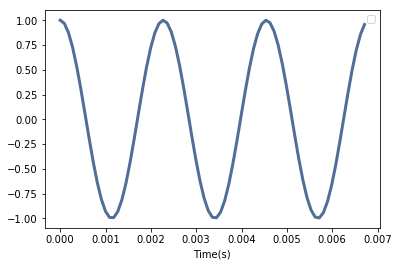

In [16]:
cos_sig.plot()
thinkplot.config(xlabel = "Time(s)")

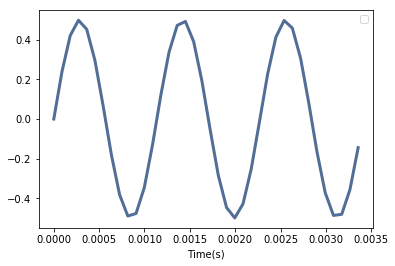

In [17]:
sin_sig.plot()
thinkplot.config(xlabel = "Time(s)")

In [18]:
mix = sin_sig + cos_sig
mix

<thinkdsp.SumSignal instance at 0x000000001D8D1948>

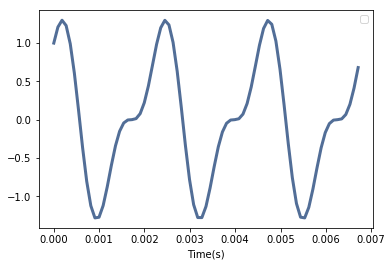

In [19]:
mix.plot()
thinkplot.config(xlabel = "Time(s)")

## Waves

In [20]:
wave = mix.make_wave(duration=0.5, start = 0, framerate=11025)
wave

<thinkdsp.Wave instance at 0x000000001D505FC8>

#### audio(Audio, make_audio)

In [21]:
from IPython.display import Audio
audio = Audio(data = wave.ys, rate = wave.framerate)
audio

In [22]:
wave.make_audio()

In [23]:
print("Number of samples", len(wave.ys))
print('Timestep in ms', 1/wave.framerate * 1000)

Number of samples 5513
Timestep in ms 0.0907029478458


Timestep in ms는 1/1000초 timestep

In [24]:
period = mix.period
segment = wave.segment(start = 0, duration = period*3) #3주기를 segment
period

0.0022727272727272726

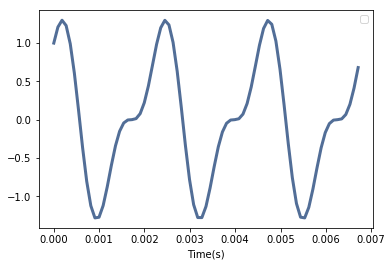

In [25]:
segment.plot()
thinkplot.config(xlabel = "Time(s)")

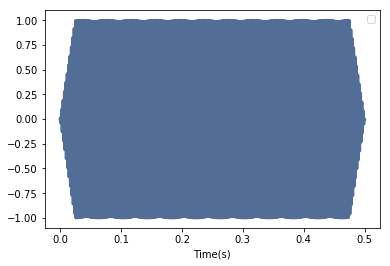

In [27]:
wave.normalize()
wave.apodize()
wave.plot()
thinkplot.config(xlabel = "Time(s)")

+ normalize()는 wave의 크기가 -1~1을 넘지 않게 해주는 함수이다.
+ apodize는 

In [28]:
wave.write('temp.wav')

Writing temp.wav


WAV file을 저장한다.

In [31]:
from thinkdsp import play_wave
play_wave(filename = "temp.wav", player="aplay")

play_wave()는 WAV file을 읽는다. 

In [32]:
from thinkdsp import read_wave
wave = read_wave('code_28042__bcjordan__voicedownbew.wav')
wave.make_audio()

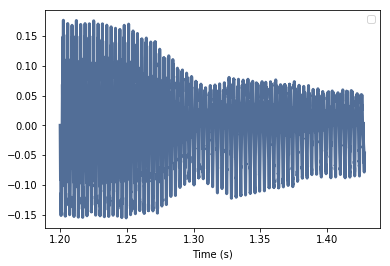

In [33]:
start = 1.2
duration = 0.6
segment = wave.segment(start, duration)
segment.plot()
thinkplot.config(xlabel ="Time (s)")

## Spectrum

In [34]:
spectrum = segment.make_spectrum()

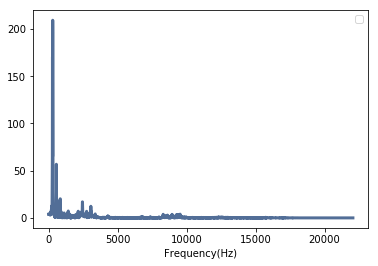

In [35]:
spectrum.plot()
thinkplot.config(xlabel = "Frequency(Hz)")

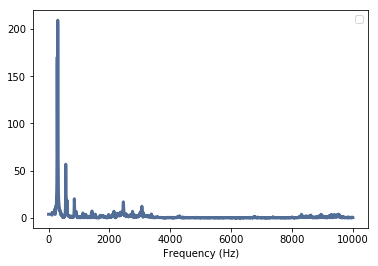

In [36]:
spectrum.plot(high = 10000)
thinkplot.config(xlabel = "Frequency (Hz)")

In [37]:
spectrum.low_pass(3000)

low_pass()는 특정 값 Frequency 이하만 값을 유지하고 그 이상은 값을 없앤다.

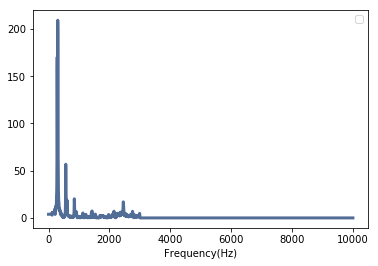

In [38]:
spectrum.plot(high = 10000)
thinkplot.config(xlabel ="Frequency(Hz)")

다시 make_wave를 하여 spectrum을 되돌릴 수 있다. 

In [39]:
filtered = spectrum.make_wave()

In [40]:
filtered.normalize()

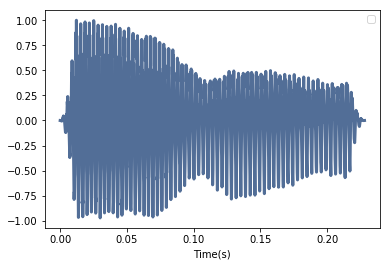

In [42]:
filtered.apodize()
filtered.plot()
thinkplot.config(xlabel ="Time(s)")

원래의 wave출력

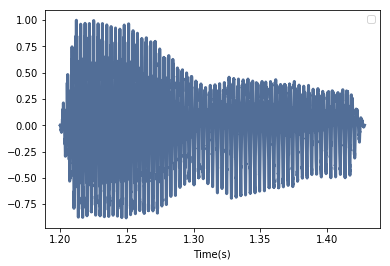

In [43]:
segment.normalize()
segment.apodize()
segment.plot()
thinkplot.config(xlabel = "Time(s)")

원본 wave가 좀더 복잡한 파형을 볼 수 있다. 전에 3000Hz를 cutoff시켰기 때문에 원본 wave보다 filtered된 wave가 좀 더 pure할 수 있다. 